In [30]:
import pandas as pd
import numpy as np


In [31]:
from tesi.database.di import get_session_maker
from tesi.zappai.di import (
    get_cds_api,
    get_climate_generative_model_repository,
    get_future_climate_data_repository,
    get_location_repository,
    get_past_climate_data_repository,
)
from tesi.zappai.repositories.dtos import ClimateDataDTO, FutureClimateDataDTO
from tesi.zappai.utils import common


session_maker = get_session_maker()
cds_api = get_cds_api()
location_repository = get_location_repository(session_maker=session_maker)
past_climate_data_repository = get_past_climate_data_repository(
    session_maker=session_maker,
    cds_api=cds_api,
    location_repository=location_repository,
)
future_climate_data_repository = get_future_climate_data_repository(
    session_maker=session_maker, cds_api=cds_api
)
climate_generative_model_repository = get_climate_generative_model_repository(
    session_maker=session_maker,
    location_repository=location_repository,
    past_climate_data_repository=past_climate_data_repository,
    future_climate_data_repository=future_climate_data_repository,
)

location = await location_repository.get_location_by_country_and_name(
    country=common.EXAMPLE_LOCATION_COUNTRY, name=common.EXAMPLE_LOCATION_NAME
)
if location is None:
    location = await location_repository.create_location(
        country=common.EXAMPLE_LOCATION_COUNTRY,
        name=common.EXAMPLE_LOCATION_NAME,
        longitude=common.EXAMPLE_LONGITUDE,
        latitude=common.EXAMPLE_LATITUDE,
    )
past_climate_data_df = ClimateDataDTO.from_list_to_dataframe(
    await past_climate_data_repository.get_past_climate_data(location.id)
)
future_climate_data_df = FutureClimateDataDTO.from_list_to_dataframe(
    await future_climate_data_repository.get_future_climate_data_for_nearest_coordinates(
        longitude=location.longitude,
        latitude=location.latitude,
        start_year=1970,
        start_month=1,
    )
)

await climate_generative_model_repository.delete_climate_generative_model(
    location_id=location.id
)
climate_generative_model, x_df_test, y_df_test = (
    await climate_generative_model_repository.create_model_for_location(
        location.id
    )
)
model = climate_generative_model.model
x_scaler = climate_generative_model.x_scaler
y_scaler = climate_generative_model.y_scaler


Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.9140 - root_mean_squared_error: 0.9559 - val_loss: 0.7403 - val_root_mean_squared_error: 0.8604
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7798 - root_mean_squared_error: 0.8830 - val_loss: 0.6212 - val_root_mean_squared_error: 0.7882
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6909 - root_mean_squared_error: 0.8307 - val_loss: 0.5181 - val_root_mean_squared_error: 0.7198
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5559 - root_mean_squared_error: 0.7454 - val_loss: 0.4258 - val_root_mean_squared_error: 0.6526
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4981 - root_mean_squared_error: 0.7055 - val_loss: 0.3453 - val_root_mean_squared_error: 0.5876
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3918 - root_mean_squared_error: 0.6256 - val_loss: 0.2793 - val_root_mean_squared_error: 0.5284
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3102

In [58]:
x_df_test

soil_temperature_level_3  volumetric_soil_water_layer_3  sin_year  \
year month                                                                      
2011 10                   293.741419                       0.152529 -1.000000   
     11                   289.806455                       0.162347 -0.866025   
     12                   286.558917                       0.191056 -0.500000   
2012 1                    283.667371                       0.203387  0.000000   
     2                    282.454511                       0.240692  0.500000   
...                              ...                            ...       ...   
2024 1                    285.878260                       0.182360  0.000000   
     2                    285.261142                       0.178380  0.500000   
     3                    286.256922                       0.196695  0.866025   
     4                    288.858824                       0.190879  1.000000   
     5                    291.249895                       0.173759  0.866025   

                cos_year  10m_u_component_of_wind  10m_v_component_of_wind  \
year month                                                                   
2011 10    -1.836970e-16                 0.461430                -1.141662   
     11     5.000000e-01                -0.181396                -0.330990   
     12     8.660254e-01                 1.268430                -0.125131   
2012 1      1.000000e+00                 1.721778                -1.836420   
     2      8.660254e-01                 1.043455                -1.545993   
...                  ...                      ...                      ...   
2024 1      1.000000e+00                 1.464902                -0.637662   
     2      8.660254e-01                 0.564335                 0.520767   
     3      5.000000e-01                 0.811452                 0.963794   
     4      6.123234e-17                 0.760184                 0.400504   
     5     -5.000000e-01                 0.367084                 0.532176   

            2m_temperature  evaporation  total_precipitation  \
year month                                                     
2011 10         290.862260    -0.003017             0.001613   
     11         287.150551    -0.001732             0.003173   
     12         284.456450    -0.001938             0.001412   
2012 1          281.515102    -0.002350             0.001162   
     2          280.743743    -0.002333             0.006076   
...                    ...          ...                  ...   
2024 1          284.485659    -0.001723             0.001416   
     2          285.610095    -0.001290             0.002229   
     3          286.796737    -0.001775             0.000971   
     4          289.575987    -0.002236             0.001208   
     5          292.594924    -0.002159             0.001128   

            surface_pressure  surface_solar_radiation_downwards  \
year month                                                        
2011 10        100051.252778                       1.192052e+07   
     11        100361.739811                       7.867499e+06   
     12        100000.368555                       6.771313e+06   
2012 1         100035.258620                       8.295657e+06   
     2          99683.801669                       8.984526e+06   
...                      ...                                ...   
2024 1         100015.995353                       7.378288e+06   
     2          99883.250332                       1.103211e+07   
     3          99534.306838                       1.623242e+07   
     4          99752.446554                       2.111158e+07   
     5          99560.803809                       2.225734e+07   

            surface_thermal_radiation_downwards  
year month                                       
2011 10                            2.856999e+07  
     11                            2.756182e+07  
     12                            2.5

In [59]:
y_df_test

soil_temperature_level_3  volumetric_soil_water_layer_3
year month                                                         
2011 10                   293.741419                       0.152529
     11                   289.806455                       0.162347
     12                   286.558917                       0.191056
2012 1                    283.667371                       0.203387
     2                    282.454511                       0.240692
...                              ...                            ...
2024 1                    285.878260                       0.182360
     2                    285.261142                       0.178380
     3                    286.256922                       0.196695
     4                    288.858824                       0.190879
     5                    291.249895                       0.173759

[152 rows x 2 columns]

In [60]:
from typing import cast

from tesi.zappai.repositories.climate_generative_model_repository import ClimateGenerativeModelRepository


x_test_scaled = cast(np.ndarray, x_scaler.transform(x_df_test))
y_test_scaled = cast(np.ndarray, y_scaler.transform(y_df_test))

x_test_formatted, y_test_formatted = ClimateGenerativeModelRepository.format_data(x=x_test_scaled, y=y_test_scaled)
x_test_formatted.shape, y_test_formatted.shape

((140, 12, 12), (140, 2))

In [65]:
predictions = model.predict(x_test_formatted)
inverse_scaled_predictions = cast(np.ndarray, y_scaler.inverse_transform(predictions))
predictions_df = pd.DataFrame(data=inverse_scaled_predictions, columns=ClimateGenerativeModelRepository.get_target())
y_df_plot = y_df_test[:-ClimateGenerativeModelRepository.get_seq_length()].copy().reset_index()
for target in ClimateGenerativeModelRepository.get_target():
    y_df_plot[f"predicted_{target}"] = predictions_df[target]
y_df_plot = y_df_plot.set_index(keys=["year", "month"], drop=True)
y_df_plot

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


soil_temperature_level_3  volumetric_soil_water_layer_3  \
year month                                                            
2011 10                   293.741419                       0.152529   
     11                   289.806455                       0.162347   
     12                   286.558917                       0.191056   
2012 1                    283.667371                       0.203387   
     2                    282.454511                       0.240692   
...                              ...                            ...   
2023 1                    285.572046                       0.226733   
     2                    283.689941                       0.237788   
     3                    285.351573                       0.230490   
     4                    286.302789                       0.222583   
     5                    289.332086                       0.242591   

            predicted_soil_temperature_level_3  \
year month                                       
2011 10                             293.063324   
     11                             289.414581   
     12                             285.473297   
2012 1                              283.007812   
     2                              282.547913   
...                                        ...   
2023 1                              283.617828   
     2                              282.794220   
     3                              283.927429   
     4                              286.349640   
     5                              289.768341   

            predicted_volumetric_soil_water_layer_3  
year month                                           
2011 10                                    0.163253  
     11                                    0.170227  
     12                                    0.200501  
2012 1                                     0.208743  
     2                                     0.221932  
...                                             ...  
2023 1                                     0.189978  
     2                                     0.196424  
     3                                     0.202344  
     4                                     0.192719  
     5                                     0.178540  

[140 rows x 4 columns]

<Axes: xlabel='year,month'>

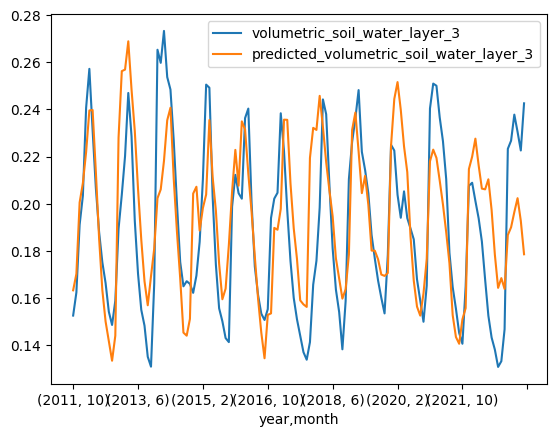

In [66]:
y_df_plot[["volumetric_soil_water_layer_3", "predicted_volumetric_soil_water_layer_3"]].plot()

<Axes: xlabel='year,month'>

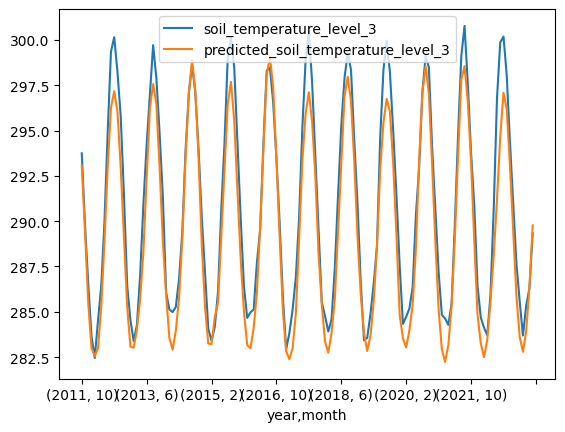

In [67]:
y_df_plot[["soil_temperature_level_3", "predicted_soil_temperature_level_3"]].plot()

In [69]:
generated_data = await climate_generative_model_repository.generate_climate_data_from_last_past_climate_data(
    location_id=location.id # type: ignore
)
generated_data

(55, 12)
(55, 10)


soil_temperature_level_3  volumetric_soil_water_layer_3  \
year month                                                            
2024 6                    296.253632                       0.158995   
     7                    297.044403                       0.150070   
     8                    297.044403                       0.150070   
     9                    296.253632                       0.158995   
     10                   297.539642                       0.164612   
     11                   301.810913                       0.182752   
     12                   301.453400                       0.170323   
2025 5                    301.274872                       0.173742   
     6                    296.413757                       0.148383   
     7                    296.440765                       0.147890   
     8                    296.444489                       0.147822   
     9                    295.654205                       0.156738   
     10                   297.264221                       0.164472   
     11                   301.241791                       0.168561   
     12                   298.782623                       0.161079   
2026 5                    297.987366                       0.191219   
     6                    296.455322                       0.148714   
     7                    296.482330                       0.148221   
     8                    297.816406                       0.152736   
     9                    296.137421                       0.155668   
     10                   298.130432                       0.169895   
     11                   301.251984                       0.168538   
     12                   298.784027                       0.161076   
2027 5                    297.987549                       0.191219   
     6                    296.455322                       0.148714   
     7                    296.482330                       0.148221   
     8                    297.816406                       0.152736   
     9                    295.654205                       0.156738   
     10                   296.940308                       0.162354   
     11                   298.924927                       0.170782   
     12                   299.915497                       0.169525   
2028 5                    299.323425                       0.195847   
     6                    297.791382                       0.153341   
     7                    297.818390                       0.152849   
     8                    297.385590                       0.162929   
     9                    297.026093                       0.161651   
     10                   299.428284                       0.174972   
     11                   300.260284                       0.175404   
     12                   300.010010                       0.191164   
2029 5                    299.653931                       0.196915   
     6                    298.146332                       0.154570   
     7                    298.227051                       0.154260   
     8                    298.171326                       0.153964   
     9                    297.472809                       0.160290   
     10                   299.465820                       0.174517   
     11                   301.251984                       0.168538   
     12                   298.664734                       0.196075   
2030 5                    299.653442                       0.196909   
     6                    298.145630                       0.154564   
     7                    298.227051                       0.154260   
     8                    298.171326                       0.153964   
     9                    296.989594                       0.161360   
     10                   300.934326                       0.184768   
     11                   300.223785                       0.175113   
     12                   300.955719

In [70]:
from tesi.zappai.repositories.climate_generative_model_repository import ClimateGenerativeModelRepository


# start generating from 1 year ago
seed_data = past_climate_data_df[(-12 - ClimateGenerativeModelRepository.get_seq_length()) : -12]
start_year, start_month = seed_data.index[-1]

filtered_future_climate_data_df = future_climate_data_df[
    ((future_climate_data_df.index.get_level_values("year") > start_year))
    | (
        (future_climate_data_df.index.get_level_values("year") == start_year)
        & (future_climate_data_df.index.get_level_values("month") > start_month)
    )
]

# this generated data start from one year ago
generated_data_df = climate_generative_model_repository.generate_data_from_seed(
    model=model,
    x_scaler=x_scaler,
    y_scaler=y_scaler,
    seed_data=seed_data,
    future_climate_data_df=filtered_future_climate_data_df,
)
true_data_df = past_climate_data_df[-12:]

In [71]:
from matplotlib import pyplot as plt

def plot_values(df: pd.DataFrame, values: list[str]):
    df_reset = df.reset_index()
    df_reset["YYYY-MM"] = (
        df_reset["year"].astype(str) + "-" + df_reset["month"].astype(str).str.zfill(2)
    )
    df_reset.plot(
        x="YYYY-MM",
        y=values,
        marker="o",
    )
    plt.xlabel("Month")
    plt.ylabel("Values")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

/tmp/ipykernel_17817/4066554255.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true_data_df["cmip5_2m_temperature"] = filtered_future_climate_data_df[:12]["2m_temperature"]


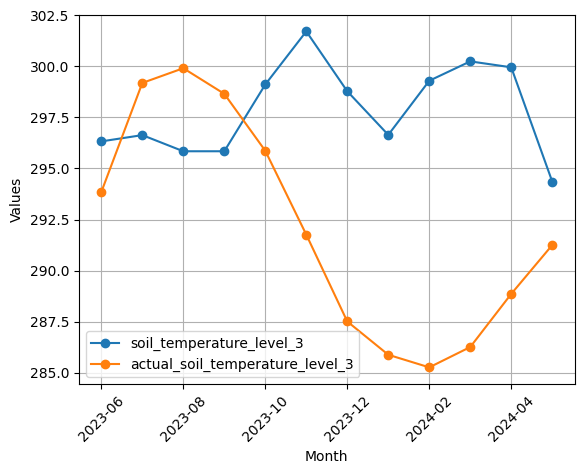

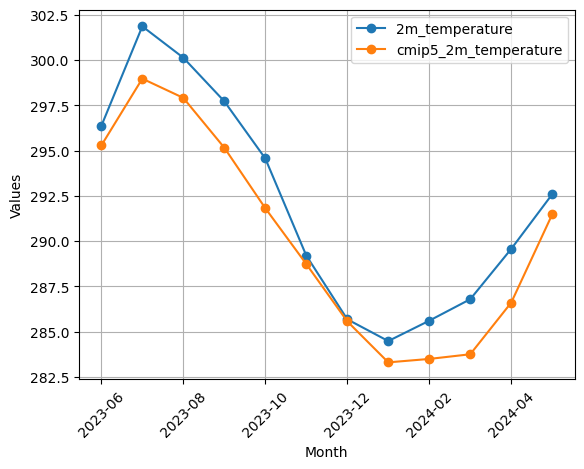

In [72]:
generated_data_df = generated_data_df[:12]
generated_data_df["actual_soil_temperature_level_3"] = true_data_df["soil_temperature_level_3"]
true_data_df["cmip5_2m_temperature"] = filtered_future_climate_data_df[:12]["2m_temperature"]
plot_values(df=generated_data_df, values=["soil_temperature_level_3", "actual_soil_temperature_level_3"])
plot_values(df=true_data_df, values=["2m_temperature", "cmip5_2m_temperature"])